In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [ ]:
# If you see train.csv in the Colab "Files" sidebar, it is in /content/
df = pd.read_csv("/content/train.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Convert to categorical
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
# Family size & Alone flag
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Extract Title
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss').replace('Mme','Mrs')
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].astype('category')

# Age groups
bins = [0, 12, 20, 40, 60, 120]
labels = ['Child','Teen','Adult','MidAge','Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

df[['PassengerId','Name','Title','Age','AgeGroup','FamilySize','IsAlone']].head()


,PassengerId,Name,Title,Age,AgeGroup,FamilySize,IsAlone
0,1,"Braund, Mr. Owen Harris",Mr,22.0,Adult,2,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,38.0,Adult,2,0
2,3,"Heikkinen, Miss. Laina",Miss,26.0,Adult,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,35.0,Adult,2,0
4,5,"Allen, Mr. William Henry",Mr,35.0,Adult,1,1


In [ ]:
overall_survival = df['Survived'].mean()
print(f"\nOverall survival rate: {overall_survival:.2%}")

print("\nSurvival by Sex:")
print(df.groupby('Sex')['Survived'].mean())

print("\nSurvival by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nSurvival by AgeGroup:")
print(df.groupby('AgeGroup')['Survived'].mean())

print("\nSurvival by Title:")
print(df.groupby('Title')['Survived'].mean())



Overall survival rate: 38.38%

Survival by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival by AgeGroup:
AgeGroup
Child     0.579710
Teen      0.381818
Adult     0.364769
MidAge    0.390625
Senior    0.227273
Name: Survived, dtype: float64

Survival by Title:
Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rare      0.347826
Name: Survived, dtype: float64


/tmp/ipython-input-4252775271.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Sex')['Survived'].mean())
/tmp/ipython-input-4252775271.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pclass')['Survived'].mean())
/tmp/ipython-input-4252775271.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())
/tmp/ipython-input-4252775271.py:14: 

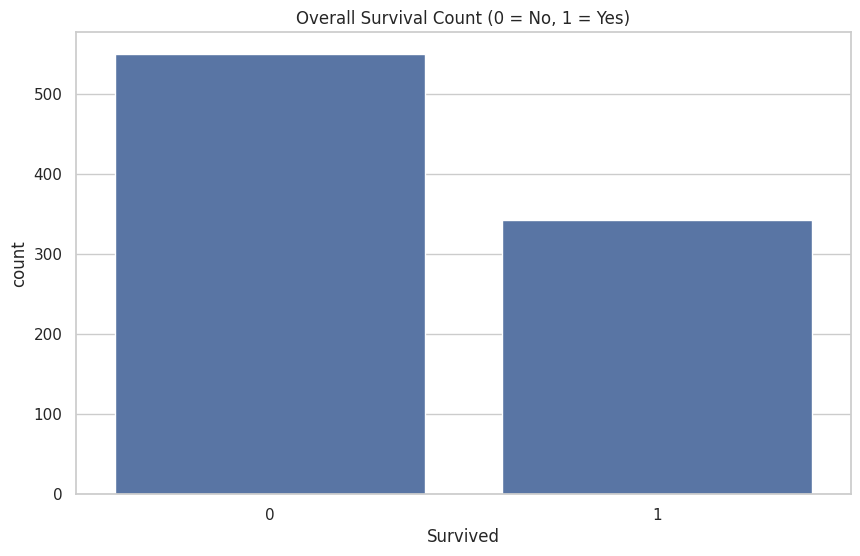

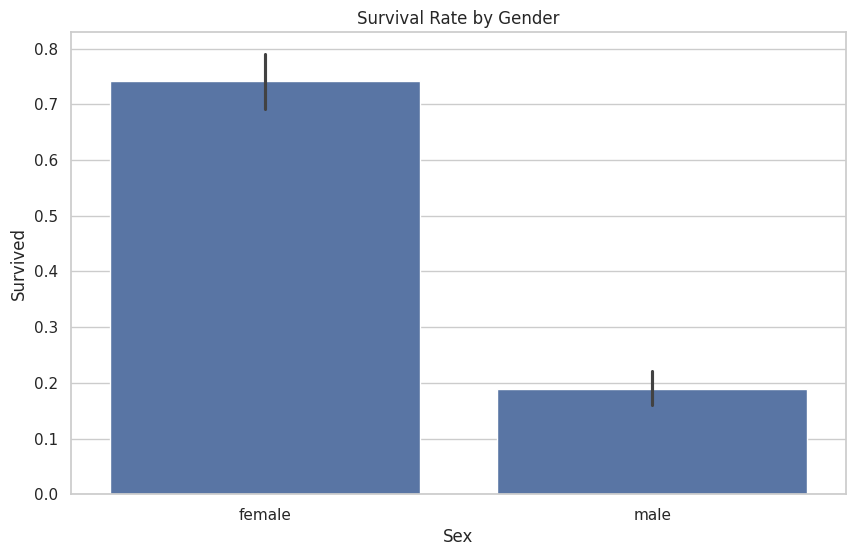

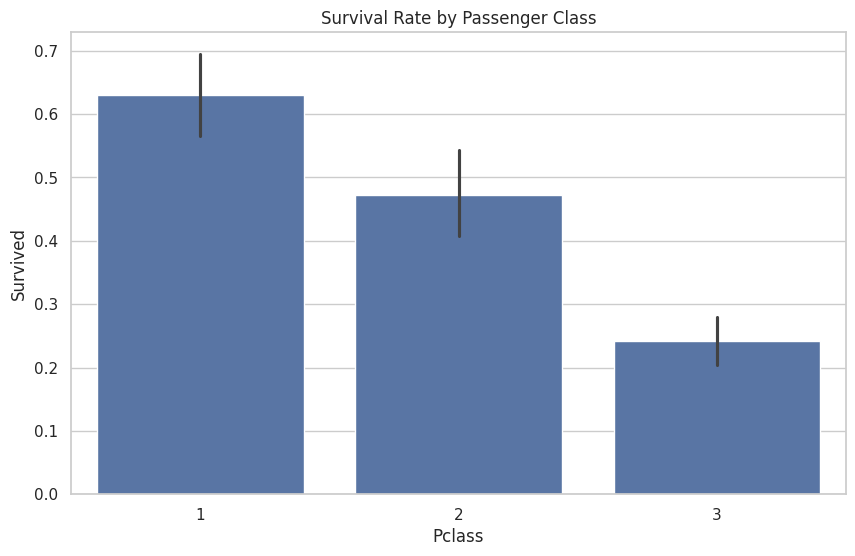

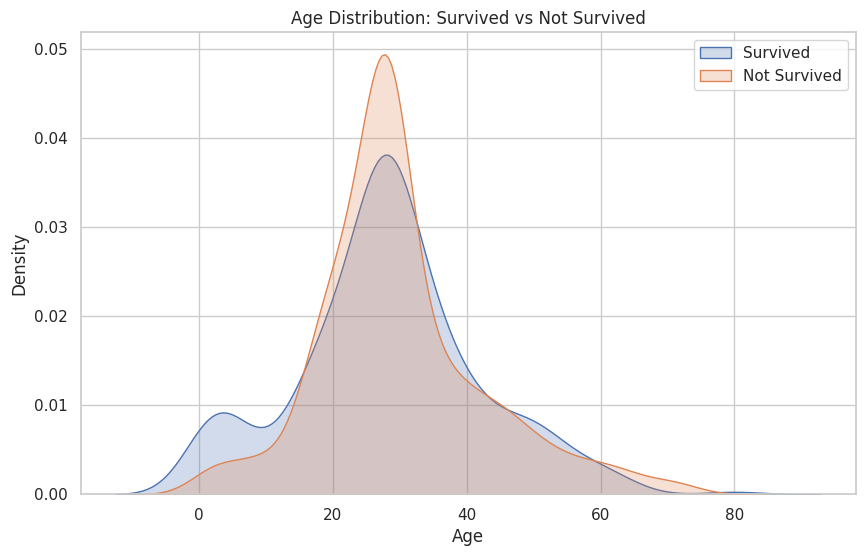

In [ ]:
# 1. Survival count
sns.countplot(x='Survived', data=df)
plt.title("Overall Survival Count (0 = No, 1 = Yes)")
plt.show()

# 2. Survival by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# 3. Survival by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# 4. Age distribution by survival
sns.kdeplot(data=df[df['Survived']==1], x="Age", label="Survived", fill=True)
sns.kdeplot(data=df[df['Survived']==0], x="Age", label="Not Survived", fill=True)
plt.title("Age Distribution: Survived vs Not Survived")
plt.legend()
plt.show()


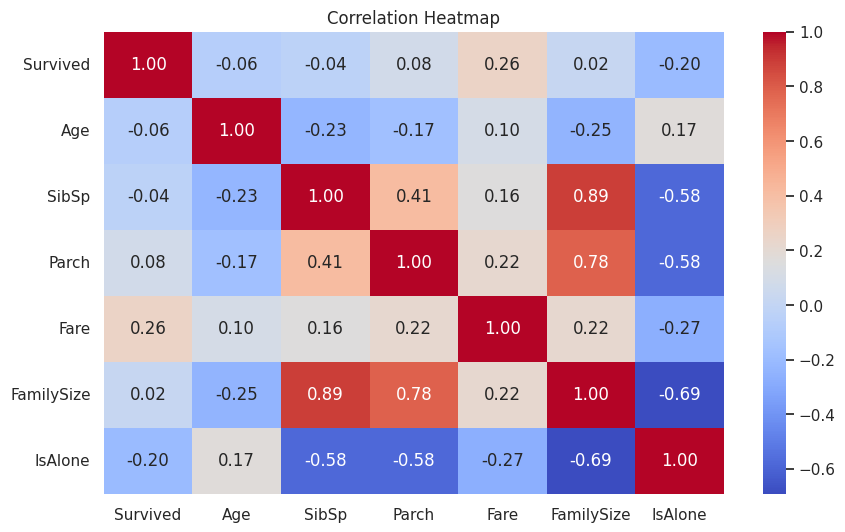

/tmp/ipython-input-845194349.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_sex_pclass = pd.pivot_table(df, index='Sex', columns='Pclass',


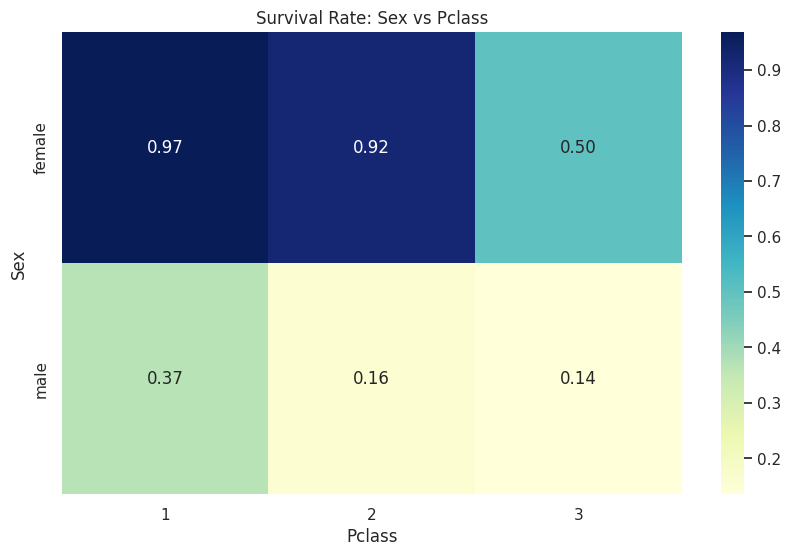

In [ ]:
# Correlation heatmap
corr = df[['Survived','Age','SibSp','Parch','Fare','FamilySize','IsAlone']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Survival by Sex & Pclass
pivot_sex_pclass = pd.pivot_table(df, index='Sex', columns='Pclass',
                                  values='Survived', aggfunc='mean')
sns.heatmap(pivot_sex_pclass, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Survival Rate: Sex vs Pclass")
plt.show()


In [ ]:
# Save cleaned CSV to /content
clean_path = '/content/titanic_cleaned.csv'
df.to_csv(clean_path, index=False)
print(f"Saved cleaned CSV to: {clean_path}")

# If you want to save to your Google Drive (optional)
# from google.colab import drive
# drive.mount('/content/drive')
# df.to_csv('/content/drive/MyDrive/titanic_cleaned.csv', index=False)


Saved cleaned CSV to: /content/titanic_cleaned.csv


In [ ]:
print("\nKey Insights:")
print("- Females had higher survival rates than males.")
print("- 1st class passengers had higher survival rates than 2nd and 3rd.")
print("- Children generally had higher survival rates than adults.")
print("- Titles (Mrs, Miss) show different survival patterns.")
print("- Family size and being alone also affected survival.")


Key Insights:
- Females had higher survival rates than males.
- 1st class passengers had higher survival rates than 2nd and 3rd.
- Children generally had higher survival rates than adults.
- Titles (Mrs, Miss) show different survival patterns.
- Family size and being alone also affected survival.
